In [1]:
# import required libraries
import sys
import re
import pandas as pd
import spacy
from pymongo import MongoClient

In [2]:
# define params for db operations
uri = 'mongodb://localhost:27017/'
database = 'zs_database'
collection_fetch = 'autotags'
collection_push = 'similarities'

# initiate variables
df = pd.DataFrame()
db = object

# connect to db. TODO: Handle exception cases
client = MongoClient(uri)
db = client[database]

# retrieving required data
df = pd.DataFrame(list(db[collection_fetch].find({}, {"_id":0, "lemmas": 1, "story_id": 1})))

df

,story_id,lemmas
0,19,"[Radio, ÜberAll, senden, mal, Zukunftsmusik, M..."
1,21,"[Dorf, pflanzen, SauerstoffMathilda, schauen, ..."
2,24,"[lang, leben, Witwer, einzig, Tochter, Mutter,..."
3,25,"[Beste, Party, Buffet, finden, Bernd, stehen, ..."
4,27,"[Endlose, Laubwälder, saftig, Weide, Wildblume..."
...,...,...
195,489,"[Familie, Maus, verlassen, alt, HausErster, Su..."
196,490,"[Wolkenland, Glück, einen, Merkmal, Wolkenland..."
197,491,"[Tag, wachen, Miro, finden, komplett, Welt, sc..."
198,492,"[Goldene, Sonnenstrahlen, fallen, klaren, Wass..."


In [3]:
import gensim
import string
from gensim import corpora
from gensim.corpora.dictionary import Dictionary

In [4]:
final_doc = df["lemmas"]
final_doc

0      [Radio, ÜberAll, senden, mal, Zukunftsmusik, M...
1      [Dorf, pflanzen, SauerstoffMathilda, schauen, ...
2      [lang, leben, Witwer, einzig, Tochter, Mutter,...
3      [Beste, Party, Buffet, finden, Bernd, stehen, ...
4      [Endlose, Laubwälder, saftig, Weide, Wildblume...
                             ...                        
195    [Familie, Maus, verlassen, alt, HausErster, Su...
196    [Wolkenland, Glück, einen, Merkmal, Wolkenland...
197    [Tag, wachen, Miro, finden, komplett, Welt, sc...
198    [Goldene, Sonnenstrahlen, fallen, klaren, Wass...
199    [Mutter, Erde, verschlafen, Dorf, namens, Natu...
Name: lemmas, Length: 200, dtype: object

In [5]:
final_doc[0]

['Radio',
 'ÜberAll',
 'senden',
 'mal',
 'Zukunftsmusik',
 'Mikrofon',
 'Krumpel',
 'Stay',
 'tunded',
 'bleib',
 'dranDas',
 'Motto',
 'Wissen',
 'Zukunft',
 'Sendeplatz',
 'Wolke',
 'erlauben',
 'grandios',
 'Überblick',
 'hören',
 'All',
 'unterm',
 'All',
 'berAllDas',
 'Beste',
 'Erde',
 'Luft',
 'frischen',
 'köstliche',
 'Luft',
 'hänge',
 'singen',
 'Lied',
 'Luft',
 'übertragen',
 'dirDie',
 'Erde',
 'manchmal',
 'knallbuntimmer',
 'blau',
 'leuchten',
 'Allfinde',
 'hierwas',
 'meist',
 'Luft',
 'seltene',
 'Gemischbestehend',
 'Stickstoff',
 'Sauerstoffund',
 'mehrdamit',
 'blas',
 'zischen',
 'pfeifen',
 'quietschtaus',
 'Ventil',
 'schönste',
 'Schlafmusik',
 'frups',
 'frupsIch',
 'Stimme',
 'Radio',
 'ÜberAll',
 'Sause',
 'Überschall',
 'durchs',
 'All',
 'senden',
 'Rand',
 'Erde',
 'Boden',
 'stehen',
 'Planet',
 'groß',
 'Sand',
 'mein',
 'Fuß',
 'wobei',
 'meistens',
 'Beton',
 'Beton',
 'Kopf',
 'helfen',
 'Sound',
 'Rhythmus',
 'gut',
 'Laune',
 'verschaffen',
 'L

In [6]:
dictionary = corpora.Dictionary(final_doc)

DT_matrix = [dictionary.doc2bow(doc) for doc in final_doc]

Lda_object = gensim.models.ldamodel.LdaModel

In [7]:
lda_model_1 = Lda_object(DT_matrix, num_topics=10, id2word = dictionary)

print(lda_model_1.print_topics(num_topics=10, num_words=5))

[(0, '0.005*"sehen" + 0.004*"fragen" + 0.004*"Frau" + 0.004*"stehen" + 0.004*"mal"'), (1, '0.004*"sehen" + 0.004*"stehen" + 0.004*"fragen" + 0.003*"mal" + 0.003*"Baum"'), (2, '0.004*"finden" + 0.004*"sehen" + 0.004*"stehen" + 0.003*"fragen" + 0.003*"Auge"'), (3, '0.006*"sehen" + 0.005*"fragen" + 0.003*"finden" + 0.003*"hören" + 0.003*"weiß"'), (4, '0.005*"sehen" + 0.004*"stehen" + 0.004*"Hand" + 0.004*"Vater" + 0.004*"fragen"'), (5, '0.005*"sehen" + 0.005*"fragen" + 0.004*"Auge" + 0.003*"mal" + 0.003*"Vater"'), (6, '0.005*"sehen" + 0.004*"stehen" + 0.004*"fragen" + 0.004*"Tier" + 0.004*"finden"'), (7, '0.007*"fragen" + 0.005*"sehen" + 0.005*"Baum" + 0.004*"stehen" + 0.003*"rufen"'), (8, '0.005*"fragen" + 0.005*"stehen" + 0.003*"Frau" + 0.003*"sehen" + 0.003*"mal"'), (9, '0.006*"sehen" + 0.004*"fragen" + 0.004*"stehen" + 0.003*"Erde" + 0.003*"denken"')]


In [8]:
doc_lda = lda_model_1[DT_matrix]

In [9]:
doc_lda

In [10]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [11]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_1.log_perplexity(DT_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_1, texts=final_doc, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.710574970239259

Coherence Score:  0.24559249598306976


In [12]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_1, DT_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.002431  0.009195       1        1  26.600922
6      0.007336 -0.003349       2        1  15.162497
0     -0.000696  0.001153       3        1  13.207276
5     -0.004438  0.003103       4        1  11.149053
9      0.007062  0.000824       5        1   9.095423
4     -0.006465  0.002060       6        1   9.088245
3     -0.000688 -0.005354       7        1   4.384355
2      0.001299 -0.000639       8        1   4.269289
1     -0.003351 -0.004668       9        1   3.931104
8     -0.002490 -0.002326      10        1   3.111840, topic_info=         Term         Freq        Total Category  logprob  loglift
762     sehen  1612.000000  1612.000000  Default  30.0000  30.0000
782    stehen  1268.000000  1268.000000  Default  29.0000  29.0000
1399   fragen  1578.000000  1578.000000  Default  28.0000  28.0000
574    finden   906.000000   906.000000  Default  27.0000  27.0000
682       mal   942.000000   942.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
539   einfach    20.092894   796.659729  Topic10  -6.2070  -0.2101
162      Hand    20.456064   858.090271  Topic10  -6.1891  -0.2665
1547  schauen    20.214010   817.673584  Topic10  -6.2010  -0.2301
685      mein    19.237551   684.935181  Topic10  -6.2505  -0.1025
739     rufen    19.243935   805.179871  Topic10  -6.2502  -0.2639

[860 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
17165      1  0.175817       <
17165      2  0.249074       <
17165      3  0.073257       <
17165      4  0.336983       <
17165      5  0.014651       <
...      ...       ...     ...
865        6  0.069584  ziehen
865        7  0.046389  ziehen
865        8  0.039253  ziehen
865        9  0.039253  ziehen
865       10  0.035684  ziehen

[3388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 1, 6, 10, 5, 4, 3, 2, 9])

In [14]:
from gensim.models.wrappers import LdaMallet
import os
os.environ.update({'MALLET_HOME':r'C:\\Users\\49175\\Documents\\js_seminar\\group_a\\model-training\\mallet-2.0.8\\mallet-2.0.8\\'})
mallet_path = 'C:\\Users\\49175\\Documents\\js_seminar\\group_a\\model-training\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=DT_matrix, num_topics=10, id2word=dictionary)

In [18]:
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=final_doc, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('Wald', 0.016476356649071273), ('Tier', 0.014775713938644346), ('Baum', 0.010402632683260816), ('sehen', 0.00781853921417055), ('fragen', 0.0073326412969057135), ('hören', 0.006913002186540628), ('Mutter', 0.006890915917574045), ('schauen', 0.006382931731342624), ('alt', 0.00616206904167679), ('leben', 0.00616206904167679)]), (1, [('Baum', 0.01824163924867769), ('Garten', 0.009703885719045437), ('Lara', 0.008745991420598892), ('Pflanze', 0.008496105951438924), ('Blume', 0.007996335013118987), ('Biene', 0.007621506809379034), ('Wiese', 0.007163383449252426), ('wachsen', 0.006746907667319145), ('Nina', 0.006413727041772521), ('Kopf', 0.006080546416225897)]), (2, [('Müll', 0.01403653627825369), ('Meer', 0.013726906801527505), ('Paul', 0.011611105377231912), ('Marie', 0.01088863659820415), ('Strand', 0.01006295799360099), ('Wasser', 0.010011353080813294), ('Lotte', 0.008256786046031582), ('Tante', 0.008205181133243885), ('Jonas', 0.007069873051914542), ('rufen', 0.006966663226339148

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=DT_matrix, texts=final_doc, start=2, limit=40, step=6)

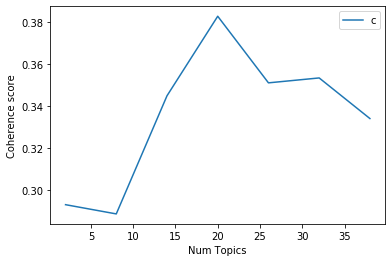

In [22]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2931
Num Topics = 8  has Coherence Value of 0.2887
Num Topics = 14  has Coherence Value of 0.3449
Num Topics = 20  has Coherence Value of 0.3827
Num Topics = 26  has Coherence Value of 0.351
Num Topics = 32  has Coherence Value of 0.3534
Num Topics = 38  has Coherence Value of 0.3341


In [25]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=20))

[(0, '0.037*"Ben" + 0.014*"Geist" + 0.013*"Miro" + 0.010*"Nola" + 0.010*"Bernd" + 0.010*"Mark" + 0.010*"Flora" + 0.010*"Jan" + 0.009*"weiß" + 0.009*"Kay" + 0.008*"sehen" + 0.007*"’" + 0.007*"Blättchen" + 0.007*"Haus" + 0.006*"’s" + 0.006*"Auto" + 0.005*"Kompass" + 0.005*"Erde" + 0.005*"Lea" + 0.005*"Kugel"'), (1, '0.026*"Marie" + 0.024*"Paul" + 0.013*"Oskar" + 0.012*"Eichhörnchen" + 0.012*"Tier" + 0.009*"Nora" + 0.008*"Bruno" + 0.008*"Eddi" + 0.008*"Mutter" + 0.007*"Jakob" + 0.006*"Emma" + 0.006*"Haus" + 0.005*"Straße" + 0.005*"Eisbären" + 0.005*"’s" + 0.005*"Herz" + 0.005*"helfen" + 0.005*"Mama" + 0.005*"Tür" + 0.004*"Abend"'), (2, '0.020*"Schnee" + 0.015*"Luft" + 0.014*"Erde" + 0.013*"Leonie" + 0.010*"Frau" + 0.010*"Baum" + 0.008*"Mathilda" + 0.008*"Jane" + 0.008*"Fin" + 0.007*"Anna" + 0.007*"hören" + 0.007*"Vincent" + 0.006*"lassen" + 0.006*"mal" + 0.006*"mein" + 0.006*"Maria" + 0.005*"sonnen" + 0.005*"Sauerstoff" + 0.005*"Kohlendioxid" + 0.005*"helfen"'), (3, '0.032*"Leon" + 0.024*

In [29]:
def format_topics_sentences(ldamodel, corpus=DT_matrix, texts=final_doc):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=DT_matrix, texts=final_doc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(200)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4926,"Schnee, Luft, Erde, Leonie, Frau, Baum, Mathil...","[Radio, ÜberAll, senden, mal, Zukunftsmusik, M..."
1,1,2.0,0.3504,"Schnee, Luft, Erde, Leonie, Frau, Baum, Mathil...","[Dorf, pflanzen, SauerstoffMathilda, schauen, ..."
2,2,5.0,0.2763,"Vater, Corinna, Junge, Mathias, Tor, Mila, Nik...","[lang, leben, Witwer, einzig, Tochter, Mutter,..."
3,3,0.0,0.2888,"Ben, Geist, Miro, Nola, Bernd, Mark, Flora, Ja...","[Beste, Party, Buffet, finden, Bernd, stehen, ..."
4,4,10.0,0.5666,"Wald, Baum, Tier, Lina, Kind, Freund, schauen,...","[Endlose, Laubwälder, saftig, Weide, Wildblume..."
...,...,...,...,...,...
195,195,19.0,0.3961,"Anna, Prinzessin, Eleonore, Isi, Fabrik, Großm...","[Familie, Maus, verlassen, alt, HausErster, Su..."
196,196,7.0,0.2745,"Erde, Welt, leben, Kind, Leben, Oma, brauchen,...","[Wolkenland, Glück, einen, Merkmal, Wolkenland..."
197,197,0.0,0.4360,"Ben, Geist, Miro, Nola, Bernd, Mark, Flora, Ja...","[Tag, wachen, Miro, finden, komplett, Welt, sc..."
198,198,8.0,0.4585,"meist, Lucio, rufen, Buch, Rhonda, Kuh, Noa, R...","[Goldene, Sonnenstrahlen, fallen, klaren, Wass..."


In [31]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4410,"Ben, Geist, Miro, Nola, Bernd, Mark, Flora, Ja...","[SilburnWas, Hitze, Sommer, heißen, Fluß, dorr..."
1,1.0,0.3917,"Marie, Paul, Oskar, Eichhörnchen, Tier, Nora, ...","[Bruno, Schlamassel, Klimawandel, begriff, sit..."
2,2.0,0.4926,"Schnee, Luft, Erde, Leonie, Frau, Baum, Mathil...","[Radio, ÜberAll, senden, mal, Zukunftsmusik, M..."
3,3.0,0.4847,"Leon, Eis, Kim, Papa, Eisbären, rufen, Tobi, K...","[UhrWenn, Jonathan, Fenster, Space, Jet, schau..."
4,4.0,0.5723,"Meer, Wasser, Strand, Müll, Insel, Sand, Fisch...","[Kailano, QualmpulverschnurKailano, kennen, qu..."
5,5.0,0.3464,"Vater, Corinna, Junge, Mathias, Tor, Mila, Nik...","[Grünkohl, BraunkohleEs, Planet, BKlimaschutz,..."
6,6.0,0.5884,"Auge, stehen, halten, ziehen, Kopf, Hand, rufe...","[CDPlayer, schabend, Geräusch, Philippa, gähne..."
7,7.0,0.4688,"Erde, Welt, leben, Kind, Leben, Oma, brauchen,...","[Herr, Gerke, total, bescheuert, stellen, Präs..."
8,8.0,0.5293,"meist, Lucio, rufen, Buch, Rhonda, Kuh, Noa, R...","[lang, lang, Bulle, namens, Rüdiger, Rüdiger, ..."
9,9.0,0.4672,"Herr, Schüler, Idee, Wald, Schule, einig, lass...","[sonnig, Frühling, Klasse, Mittelschule, bayer..."


In [35]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(20)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,2.0,"Schnee, Luft, Erde, Leonie, Frau, Baum, Mathil...",8.0,0.040
1.0,2.0,"Schnee, Luft, Erde, Leonie, Frau, Baum, Mathil...",3.0,0.015
2.0,5.0,"Vater, Corinna, Junge, Mathias, Tor, Mila, Nik...",6.0,0.030
3.0,0.0,"Ben, Geist, Miro, Nola, Bernd, Mark, Flora, Ja...",9.0,0.045
4.0,10.0,"Wald, Baum, Tier, Lina, Kind, Freund, schauen,...",9.0,0.045
5.0,5.0,"Vater, Corinna, Junge, Mathias, Tor, Mila, Nik...",10.0,0.050
6.0,8.0,"meist, Lucio, rufen, Buch, Rhonda, Kuh, Noa, R...",11.0,0.055
7.0,5.0,"Vater, Corinna, Junge, Mathias, Tor, Mila, Nik...",8.0,0.040
8.0,3.0,"Leon, Eis, Kim, Papa, Eisbären, rufen, Tobi, K...",7.0,0.035
9.0,0.0,"Ben, Geist, Miro, Nola, Bernd, Mark, Flora, Ja...",9.0,0.045
